# __Simple Linear Regression in Python__

By: Trevor Rowland ([dBCooper2](https://github.com/dBCooper2))

Creating a Linear Regression Model from scratch to run CAPM Analysis and Fama-French Models

## The Theory

This regression model uses an Ordinary Least Squares(OLS) approach to regression. The OLS model plots a line on a scatter plot, measures how far away it is from each point, then iteratively adjusts the slope and y-intercept in the linear equation to provide the line of best fit for the data.

_How does this happen?_

The Regression Model plots a line through all of the points in our dataset. If we take the sum of all the 'errors' in our line, which can be defined as the difference between the actual $y$-value from our data and the predicted $y$-value from our regression line. Squaring those errors and dividing that sum of all squared errors by the number of y-values gives us a measure called the __Mean Squared Error__, or MSE:

$$MSE=\frac{1}{n} \sum_{i=0}^{n}(Y_i - \hat{Y}_i)^2$$

given

$$ \hat{Y}_i = mx_i+b$$

### Mean Squared Error

__The Mean Squared Error tells us what our average error is__, and to make the best-fit regression line, we need to __minimize that error__. 

Because our data cannot be modified, to develop the best-fit regression line we can only modify our slope($m$) and our y-intercept($b$). This involves iterating over many different calculated values of $m$ and $b$, so how will the program know how to adjust the values across iterations?

The program will adjust the values by calculating the gradient descent of our Error($E$) with respect to $m$ and with respect to $b$. This can be done using partial derivatives of the Error function to find the fastest way to increase our Error because derivatives measure a rate of change. Because we want a gradient _descent_ instead of ascent, which is what the partial derivative will calculate, we can simply use it's inverse to find the fastest way to decrease the error. Here are the calculations to find those gradient descent functions:

$$ MSE = E(\hat{Y}_i) = (\frac{1}{n}) \sum_{i=0}^{n}(Y_i - \hat{Y}_i)^2$$

which decomposes into:

$$ MSE = E(m,b) = (\frac{1}{n}) \sum_{i=0}^{n}(Y_i - (mx_i+b))^2$$

and for easier calculations, can be fully expanded into:

$$ E(m,b) = (\frac{1}{n}) \sum_{i=0}^{n}(Y_i^2 -2Y_imx_i-2Y_ib+m^2x_i^2+2mx_ib+b^2)$$

### Partial Derivatives of the Error Function

Taking the Partial Derivative of E(m,b) with respect to m:

$$(\frac{\partial}{\partial m})E(m,b) = (\frac{\partial}{\partial m})(\frac{1}{n}) \sum_{i=0}^{n}(Y_i^2 -2Y_imx_i-2Y_ib+m^2x_i^2+2mx_ib+b^2)$$

$$\frac{\partial E}{\partial m} = (\frac{1}{n}) \sum_{i=0}^{n}( -2Y_ix_i+2mx_i^2+2x_ib)$$

$$\frac{\partial E}{\partial m} = (\frac{-2}{n}) \sum_{i=0}^{n}(Y_ix_i-mx_i^2-x_ib)$$

$$\frac{\partial E}{\partial m} = (\frac{-2}{n}) \sum_{i=0}^{n}x_i(Y_i-mx_i-b)$$

$$\frac{\partial E}{\partial m} = (\frac{-2}{n}) \sum_{i=0}^{n}[x_i(Y_i-(mx_i+b))]$$

Taking the Partial Derivative of E(m,b) with respect to b:

$$(\frac{\partial}{\partial b})E(m,b) = (\frac{\partial}{\partial b})(\frac{1}{n}) \sum_{i=0}^{n}(Y_i^2 -2Y_imx_i-2Y_ib+m^2x_i^2+2mx_ib+b^2)$$

$$\frac{\partial E}{\partial b} = (\frac{1}{n}) \sum_{i=0}^{n}(-2Y_i+2mx_i+2b)$$

$$\frac{\partial E}{\partial b} = (\frac{-2}{n}) \sum_{i=0}^{n}(Y_i-mx_i-b)$$

$$\frac{\partial E}{\partial b} = (\frac{-2}{n}) \sum_{i=0}^{n}(Y_i-(mx_i+b))$$

After these calculations, we are left with the partial derivatives of our error function:

$$\frac{\partial E}{\partial m} = (\frac{-2}{n}) \sum_{i=0}^{n}[x_i(Y_i-(mx_i+b))]$$

$$\frac{\partial E}{\partial b} = (\frac{-2}{n}) \sum_{i=0}^{n}(Y_i-(mx_i+b))$$

### The Gradient Descent

The gradient descent function is calculated by subtracting our partial derivative from the current value of $m$ or $b$, respectively, so our equations for the learning rate look like this:

$$m_{new} = m_{current} - \frac{\partial E}{\partial m}$$

$$b_{new} = m_{current} - \frac{\partial E}{\partial b}$$

This would be great if the program was going to run all at once, but because the regression function will be calculated iteratively, we need to multiply the partial derivatives by a constant to set the step size for each iteration. This is known as the __Learning Rate__, and will be denoted by $L$, making the gradient descent functions: 

$$m_{new} = m_{current} - L\frac{\partial E}{\partial m}$$

$$b_{new} = m_{current} - L\frac{\partial E}{\partial b}$$

where $0 < L <1$

We will set the learning rate value later, but the important thing to note now is that the smaller the learning rate or step size, the more accurate our model will theoretically be. For example, $L=.1$ is going to be less precise than $L=.001$, which is less precise than $L=.00001$, and so on.

## Applying the Theory to Python

To apply the calculations we just performed on our Error function in python, we need to define our gradient descent function in python, and then iterate over calls to that function.

### Gradient Descent Function

In [2]:
def gradient_descent(m_current, b_current, df, learning_rate):
    m_gradient = 0
    b_gradient = 0

    n = len(df) # The number of rows in the dataset

    # Calculate the partial derivative summations
    for i in range(n):
        x = df.iloc[i].x
        y = df.iloc[i].y

        # These are a pythonic representation of partial derivative equations found in the theory section
        m_gradient += (-2/n) * x * (y - (m_current * x + b_current))
        b_gradient += (-2/n) * (y - (m_current * x + b_current))

    # Calculate the Gradient Descent equations from the theory section
    m = m_current - learning_rate * m_gradient
    b = b_current - learning_rate * b_gradient

    return m,b

### Performing Linear Regression

Now that we have the gradient descent function, we can write a function that iteratively calls gradient_descent(), minimizing the error of our regression line

In [3]:
def ols_regression(learning_rate, iterations, df):
    m = 0
    b = 0

    for i in range(iterations):
        m,b = gradient_descent(m, b, df, learning_rate)

    return m,b

### Testing the Linear Regression Model

To apply the functions we defined, we need to take a dataset and perform the regression on it. The [dataset](https://www.kaggle.com/datasets/luddarell/101-simple-linear-regressioncsv?resource=download) I am using is just a simple CSV file by [luddarell](https://www.kaggle.com/luddarell) from [kaggle](https://www.kaggle.com/).

In [11]:
import pandas as pd

# Import the Data
file = '/Users/dB/Documents/repos/github/portfolio-backtesting/docs/data/1.01_Simple_linear_regression.csv'
df = pd.read_csv(file)
df = df.rename(columns={"SAT":"y", "GPA":"x"})


In [12]:
# Run the Regression Model:
learning_rate = .00001
iterations = 10000
m,b = ols_regression(learning_rate, iterations, df)
print(m,b)

462.1944641696966 139.10014019170407


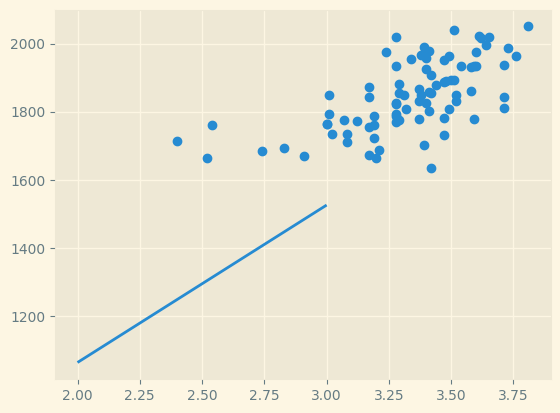

In [21]:
import matplotlib.pyplot as plt

plt.style.use('Solarize_Light2')
plt.scatter(df.x, df.y)
plt.plot(list(range(2,4)), [m * x + b for x in range(2,4)])
plt.show()